In [14]:
#CSCE
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Map Generation
G = nx.Graph()
G.add_edges_from([(0,1, {'weight': 6}), (0, 4, {'weight': 9}), (1, 3,{'weight': 11}), (2,4, {'weight': 10}), (3,4, {'weight': 7})])

node degree and node clustering
0 2 0
1 2 0
4 3 0
3 2 0
2 1 0

the adjacency list
0 1 4
1 3
4 2 3
3
2


<ipython-input-3-0c80073007d3>:14: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7}


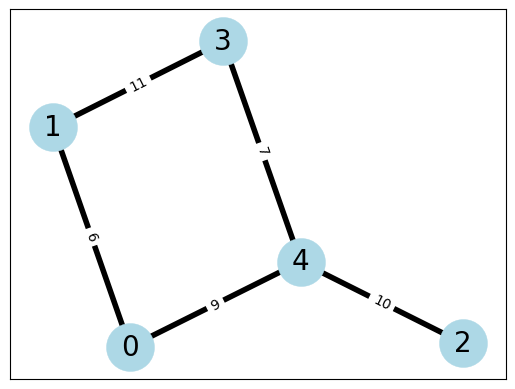

In [3]:
import matplotlib.pyplot as plt

# some properties
print("node degree and node clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                               # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(G, 'weight','trips')
print(edge_labels)
#print("%.2f" % edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()


In [11]:
def calculate_benefit(spd, d, nt_XY, nt_YX, sum_Xn, sum_Yn):
  base_benefit = (spd - d) * (nt_XY + nt_YX)

  benefit_to_XNeighbors = sum(
      [max(spd_Xn - d - d_Yn, 0) * nt_Xn for nt_Xn, d_Yn in sum_Xn]
  )

  benefit_to_YNeighbors = sum(
      [max(spd_Yn - d - d_Xn, 0) * nt_Yn for nt_Yn, d_Xn in sum_Yn]
  )

  return base_benefit + benefit_to_XNeighbors + benefit_to_YNeighbors

In [10]:
shortest_path_length = nx.dijkstra_path_length(G,2,1)
print(f"The shortest path of the length from node 1 to node 1 is: {shortest_path_length}")

The shortest path of the length from node 1 to node 1 is: 25


In [13]:
from networkx.algorithms.shortest_paths.astar import astar_path

G = nx.Graph()
G.add_edges_from([(0, 1, {'weight': 6}), (0, 4, {'weight':9}), (1, 3, {'weight': 11}), (2,4, {'weight': 10}), (3,4, {'weight': 7})])
shortest_path = astar_path(G, source = 2, target = 1, weight = 'weight')
print("shortest path using A*: ", shortest_path)
shortest_path_length = nx.astar_path_length(G, source = 2, target = 1, weight = 'weight')
print("Length of the shortest path using A*: ", shortest_path_length)

shortest path using A*:  [2, 4, 0, 1]
Length of the shortest path using A*:  25


In [ ]:
trip_list = []
